In [3]:
import os

import numpy as np
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt

from utils import load_hidden_representations_from_hdf5, read_templates_from_file

----

In [4]:
# params
log_dir = "/logfiles"
model = "bigscience-T0_3B" # bigscience-T0_B or bigscience-T0
module = "encoder" # encoder or decoder
# task = "rte"
# task = "cb"
task = "wic"

## Prompts

In [5]:
df = read_templates_from_file(f"/t0-analysis/prompts/{task}.csv")
display(df)

,name,template,category,includes_labels,shuffle
0,gpt_3,{sentence1} {sentence2} Question: Is the word ...,instructive,False,False
1,gpt_3_yes_no,{sentence1} {sentence2} Question: Is the word ...,instructive,True,False
2,affirmation,Sentence A: {sentence1} Sentence B: {sentence2...,instructive,True,False
3,grammar_homework,"Decide whether the word ""{word}"" is used with ...",instructive,True,False
4,polysemous,"The word ""{word}"" has multiple meanings. Does ...",instructive,True,False
5,question_context,"Determine if the word ""{word}"" is used in the ...",instructive,False,False
6,question_meaning,"Determine if the word ""{word}"" have the same m...",instructive,False,False
7,question_meaning_yes_no,"Does the word ""{word}"" have the same meanining...",instructive,True,False
8,same_sense,Sentence 1: {sentence1} Sentence 2: {sentence2...,instructive,True,False
9,similar_sense,{sentence1} {sentence2} Similar sense of {word}?,instructive,False,False


## Plot t-SNE embeddings

In [6]:
# RTE patterns
# use_pattern = [
#     "null_pattern",
#     "null_pattern_reversed",
#     "gpt_3_yes_no",
#     "gpt_3_yes_no_shuffled",
#     "gpt_3_true_false",
#     "gpt_3_true_false_shuffled",
#     "start_with_the",
#     "mnli_crowdsource",
#     "based_on_previous_passage",
#     "infer",
#     "follow",
#     "imply",
#     "guaranteed",
#     "justified", 
#     "must_be_true",
#     "should_assume"
# ]

# CB patterns
# use_pattern = [
#     "null_pattern",
#     "null_pattern_reversed",
#     "gpt_3_true_false_neither",
#     "gpt_3_yes_no_maybe",
#     "mnli_crowdsource",
#     "always_sometimes_never",
#     "based_on_previous_passage",
#     "infer",
#     "claim",
#     "consider",
#     "follow",
#     "imply",
#     "guaranteed",
#     "guaranteed_possible",
#     "justified",
#     "must_be_true",
#     "should_assume",
#     "take_the_following",
# ]

# WIC patterns
use_pattern = [
    "gpt_3",
    "gpt_3_yes_no",
    "affirmation",
    "grammar_homework",
    "polysemous",
    "question_context",
    "question_meaning",
    "question_meaning_yes_no",
    "same_sense",
    "similar_sense",
    "similar_sense_yes_no",
]

(7018, 2048)


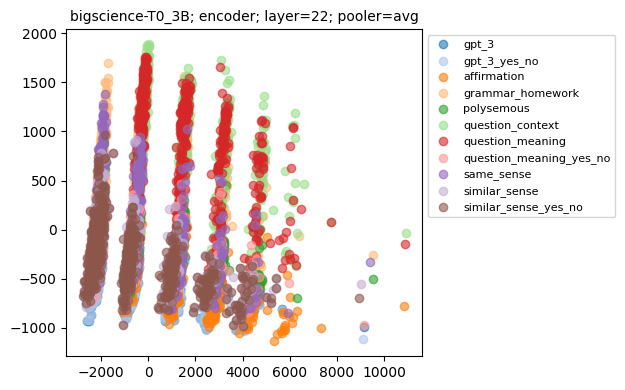

(7018, 2048)


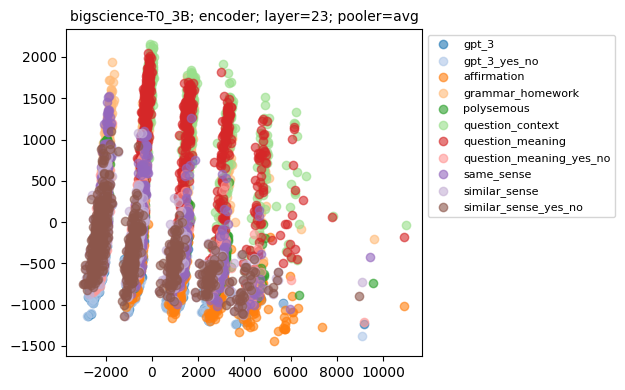

(7018, 2048)


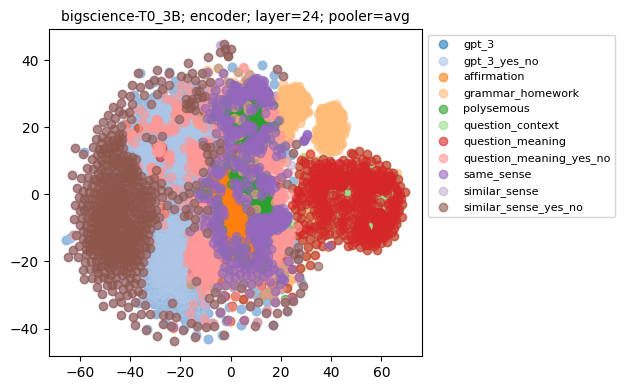

In [7]:
# for layer in range(0, 1):
# for layer in range(0, 5):
# for layer in range(0, 25):
for layer in range(22, 25):
    
    file_names, prompt_names = [], []

    for _, row in df.iterrows():
        if row['name'] in use_pattern:
            file_names.append(f"{task}/{model}/{module}/{row['name']}/hidden_represenations_layer{layer}_avg.hdf5")
            prompt_names.append(row['name'])
    
    # load hidden representations from hdf5 file
    representations = None
    n_sequences = 0

    for file_name in file_names:
        hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name), silent=True)
        n_sequences = hidden_representations.shape[0]

        if representations is None:
            representations = hidden_representations
        else:
            representations = np.concatenate((representations, hidden_representations), axis=0)

    print(representations.shape)

    # compute t-SNE embeddings
    X = TSNE(
        n_components=2, 
        perplexity=100, 
        init='pca', # random or pca
        learning_rate=100,
        n_iter=1000
    ).fit_transform(representations)

    # plot t-SNE embeddings
    fig, axes = plt.subplots(1, 1, figsize=(5.5,4), dpi=100)

    cmap = matplotlib.cm.get_cmap('tab20')
    colors = cmap.colors

    for idx, file_name in enumerate(file_names):
        axes.scatter(X[n_sequences*idx:n_sequences*(idx + 1), 0], X[n_sequences*idx:n_sequences*(idx + 1), 1], alpha=0.6, color=colors[idx], label=prompt_names[idx])

    axes.set_title(f"{task}; {model}; {module}; layer={layer}; pooler=avg", fontsize=10)

   # Shrink current axis by 20%
    box = axes.get_position()
    axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    axes.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fancybox=True, shadow=False, fontsize=8)

    plt.tight_layout()

    plt.show()
    plt.close();

In [8]:
df

,name,template,category,includes_labels,shuffle
0,gpt_3,{sentence1} {sentence2} Question: Is the word ...,instructive,False,False
1,gpt_3_yes_no,{sentence1} {sentence2} Question: Is the word ...,instructive,True,False
2,affirmation,Sentence A: {sentence1} Sentence B: {sentence2...,instructive,True,False
3,grammar_homework,"Decide whether the word ""{word}"" is used with ...",instructive,True,False
4,polysemous,"The word ""{word}"" has multiple meanings. Does ...",instructive,True,False
5,question_context,"Determine if the word ""{word}"" is used in the ...",instructive,False,False
6,question_meaning,"Determine if the word ""{word}"" have the same m...",instructive,False,False
7,question_meaning_yes_no,"Does the word ""{word}"" have the same meanining...",instructive,True,False
8,same_sense,Sentence 1: {sentence1} Sentence 2: {sentence2...,instructive,True,False
9,similar_sense,{sentence1} {sentence2} Similar sense of {word}?,instructive,False,False


In [9]:
df[df['name'] == 'consider']['template'].values

array([], dtype=object)